In [21]:
import pandas as pd
import seaborn as sns
import plotly_express as px
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt

### Reading files

In [3]:
data = pd.read_excel('imdb_top_1000.xlsx')
data.head()

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.3,80.0,2343110,28341469.0
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,175,9.2,100.0,1620367,134966411.0
2,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,152,9.0,84.0,2303232,534858444.0
3,The Godfather: Part II,1974,"Crime, Drama",Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,202,9.0,90.0,1129952,57300000.0
4,12 Angry Men,1957,"Crime, Drama",Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,96,9.0,96.0,689845,4360000.0


In [42]:
### there is nulls in "Meta_score" and "Gross"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Name     750 non-null    object 
 1   Released_Year  750 non-null    int64  
 2   Genre          750 non-null    object 
 3   Director       750 non-null    object 
 4   Star1          750 non-null    object 
 5   Star2          750 non-null    object 
 6   Star3          750 non-null    object 
 7   Star4          750 non-null    object 
 8   Runtime (min)  750 non-null    int64  
 9   IMDB_Rating    750 non-null    float64
 10  Meta_score     750 non-null    float64
 11  No_of_Votes    750 non-null    int64  
 12  Gross          750 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 76.3+ KB


### descriptive statistics over data

In [5]:
data.describe()

,Released_Year,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,1991.221000,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,23.285669,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


### #removing null values in columns meta score,Gross

In [6]:
data.dropna(subset=['Gross','Meta_score'],inplace= True)
data.shape

(750, 13)

In [7]:
data.reset_index(drop = True, inplace= True)

In [8]:
data['Released_Year'].unique()

array([1994, 1972, 2008, 1974, 1957, 2003, 1993, 2010, 1999, 2001, 1966,
       2002, 1990, 1980, 1975, 2019, 2014, 1998, 1997, 1995, 1991, 1977,
       1954, 2011, 2006, 2000, 1988, 1985, 1968, 1960, 1942, 1936, 1931,
       2018, 2016, 2017, 2012, 2009, 1981, 1979, 1964, 2004, 1992, 1987,
       1986, 1984, 1983, 1976, 1973, 1971, 1965, 1962, 1959, 1958, 1952,
       1944, 1941, 1927, 2013, 2007, 2005, 1989, 1963, 1955, 1950, 1948,
       2015, 1996, 1982, 1978, 1967, 1951, 1949, 1940, 1939, 1934, 1970,
       1969, 1961, 1946, 1930, 1925, 1947, 1938, 1933, 1935, 1953],
      dtype=int64)

### Normalization features for furter analysis using sklearn(ML) library 

In [43]:
scaler = MinMaxScaler()
X = data[['Gross','IMDB_Rating','Meta_score']]
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.min(axis=0)
X_scaled.max(axis=0)

array([1., 1., 1.])

In [45]:
pd.DataFrame(X_scaled, columns = ['Gross_s','IMDB_Rating_s','Meta_score_s'])

,Gross_s,IMDB_Rating_s,Meta_score_s
0,0.030257,1.000000,0.722222
1,0.144092,0.941176,1.000000
2,0.571025,0.823529,0.777778
3,0.061173,0.823529,0.861111
4,0.004653,0.823529,0.944444
...,...,...,...
745,0.000742,0.000000,0.680556
746,0.001470,0.000000,0.305556
747,0.151434,0.000000,0.513889
748,0.014710,0.000000,0.944444


### Creating final data set

In [10]:
df = pd.concat([data,pd.DataFrame(X_scaled, columns = ['Gross_s','IMDB_Rating_s','Meta_score_s'])],axis = 1)
df.head()

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross,Gross_s,IMDB_Rating_s,Meta_score_s
0,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.3,80.0,2343110,28341469.0,0.030257,1.000000,0.722222
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,175,9.2,100.0,1620367,134966411.0,0.144092,0.941176,1.000000
2,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,152,9.0,84.0,2303232,534858444.0,0.571025,0.823529,0.777778
3,The Godfather: Part II,1974,"Crime, Drama",Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,202,9.0,90.0,1129952,57300000.0,0.061173,0.823529,0.861111
4,12 Angry Men,1957,"Crime, Drama",Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,96,9.0,96.0,689845,4360000.0,0.004653,0.823529,0.944444


### Adding "Main Genre" feature to simplify data categorization 

In [46]:
df['Main_Genre'] = df.apply(lambda genre: genre['Genre'].split(",")[0],axis =1)

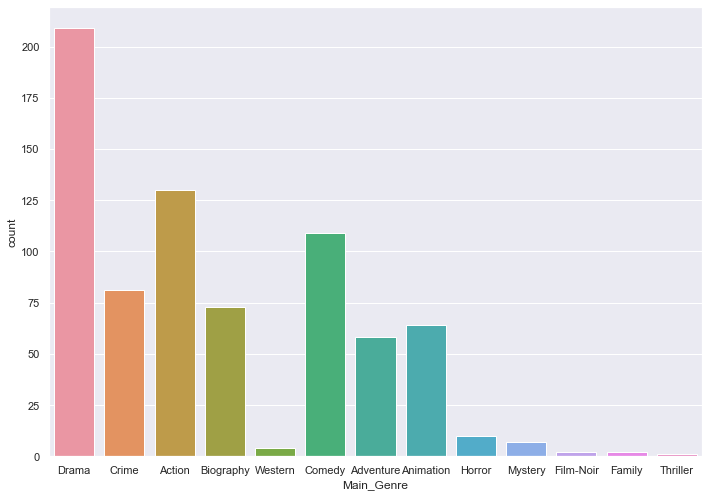

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df['Main_Genre'])

In [48]:
### Main_Genre frequency 
df.Main_Genre.value_counts(normalize = True)
#### Main_Genre laeding is : Drama,Action,Comedy  

Drama        0.278667
Action       0.173333
Comedy       0.145333
Crime        0.108000
Biography    0.097333
Animation    0.085333
Adventure    0.077333
Horror       0.013333
Mystery      0.009333
Western      0.005333
Film-Noir    0.002667
Family       0.002667
Thriller     0.001333
Name: Main_Genre, dtype: float64

In [13]:
df['IMDB_Rating_score_Gross_avg'] = df[['Gross_s', 'IMDB_Rating_s','Meta_score_s']].mean(axis=1)
df.head()

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross,Gross_s,IMDB_Rating_s,Meta_score_s,Main_Genre,IMDB_Rating_score_Gross_avg
0,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.3,80.0,2343110,28341469.0,0.030257,1.000000,0.722222,Drama,0.584160
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,175,9.2,100.0,1620367,134966411.0,0.144092,0.941176,1.000000,Crime,0.695089
2,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,152,9.0,84.0,2303232,534858444.0,0.571025,0.823529,0.777778,Action,0.724111
3,The Godfather: Part II,1974,"Crime, Drama",Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,202,9.0,90.0,1129952,57300000.0,0.061173,0.823529,0.861111,Crime,0.581938
4,12 Angry Men,1957,"Crime, Drama",Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,96,9.0,96.0,689845,4360000.0,0.004653,0.823529,0.944444,Crime,0.590876


## q1 : Which gener is the most popular

In [15]:
# The most poplour genre who has the maximum value of "IMDB_Rating_score_Gross_avg" (avg of normalized three main features)
df.query('IMDB_Rating_score_Gross_avg == IMDB_Rating_score_Gross_avg.max()')[['Genre','Main_Genre']]

,Genre,Main_Genre
2,"Action, Crime, Drama",Action


## q2 : Which are the top 5 directors? Please create KPIs to define top director (assume equal % of cost/profit)

In [16]:
df_Director = df.groupby(['Director'],as_index= False).agg(Total_movies = ('Movie_Name','count'), 
                                             mean_Gross = ('Gross','mean'),
                                             mean_IMDB_Rating = ('IMDB_Rating','mean'),
                                             mean_Meta_score = ('Meta_score','mean'),
                                             No_of_Votes = ('No_of_Votes','mean')              
                                                         )
df_Director.head()

,Director,Total_movies,mean_Gross,mean_IMDB_Rating,mean_Meta_score,No_of_Votes
0,Abdellatif Kechiche,1,2.199675e+06,7.700000,89.000000,138741.0
1,Abhishek Kapoor,1,1.122527e+06,7.700000,40.000000,32628.0
2,Adam McKay,1,7.025987e+07,7.800000,81.000000,362942.0
3,Akira Kurosawa,3,1.500460e+06,8.333333,97.333333,193607.0
4,Alan J. Pakula,1,7.060000e+07,7.900000,84.000000,103031.0


In [14]:
df.sort_values('IMDB_Rating_score_Gross_avg', ascending = False).Director[0:5]

2        Christopher Nolan
1     Francis Ford Coppola
5            Peter Jackson
51           Anthony Russo
10           Peter Jackson
Name: Director, dtype: object

In [17]:
df_Director.sort_values(['mean_Gross'],ascending=False).head(5)

,Director,Total_movies,mean_Gross,mean_IMDB_Rating,mean_Meta_score,No_of_Votes
24,Anthony Russo,4,5.512599e+08,8.075000,72.75,761065.750000
116,Gareth Edwards,1,5.321773e+08,7.800000,65.00,556608.000000
152,J.J. Abrams,3,4.743903e+08,7.833333,78.00,633782.333333
208,Josh Cooley,1,4.340380e+08,7.800000,84.00,203177.000000
337,Roger Allers,1,4.227838e+08,8.500000,88.00,942045.000000


In [18]:
df_Director.sort_values(['mean_IMDB_Rating'],ascending=False).head(5)

,Director,Total_movies,mean_Gross,mean_IMDB_Rating,mean_Meta_score,No_of_Votes
110,Frank Darabont,2,82571421.5,8.95,70.5,1745452.0
225,Lana Wachowski,1,171479930.0,8.70,73.0,1676426.0
149,Irvin Kershner,1,290475067.0,8.70,82.0,1159315.0
104,Fernando Meirelles,1,7563397.0,8.60,79.0,699256.0
124,George Lucas,1,322740140.0,8.60,90.0,1231473.0


### KPI's:
#### 1. mean_Gross for Director
#### 2. mean_IMDB_Rating
#### 3. num of movies / genrer (optional)

## q3 : Create a mock dashboard for helping the film producer to pick a director

## 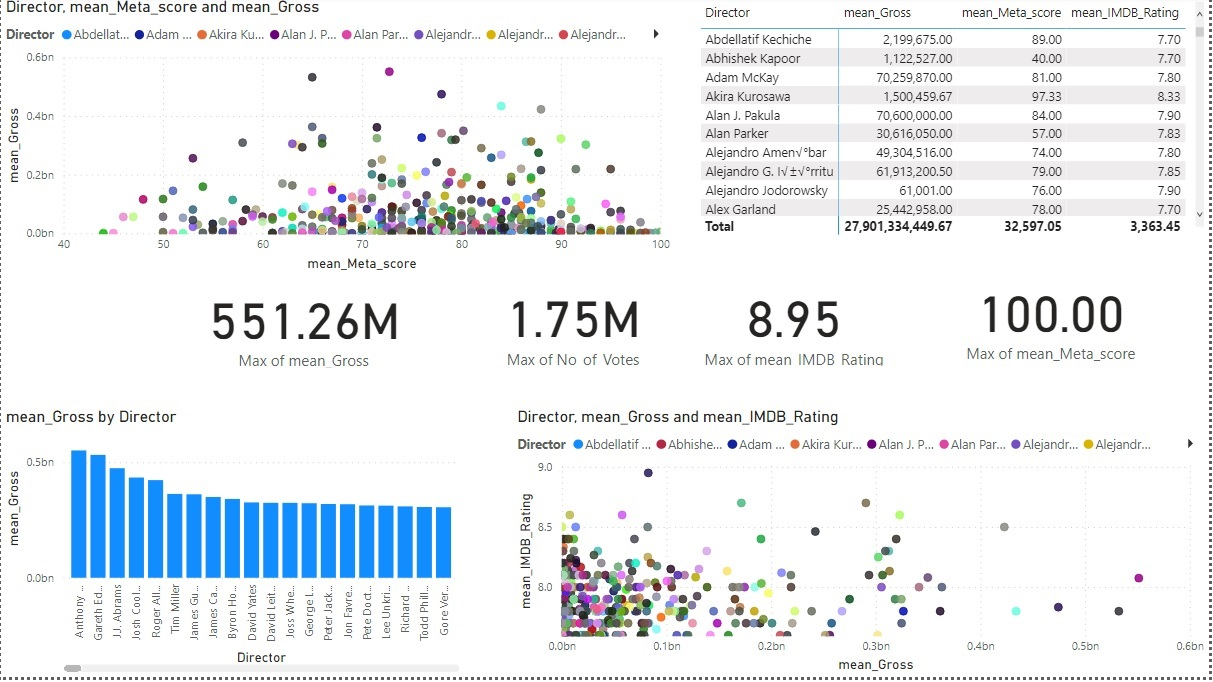

## q4 : Analyze the dataset and write 2 insights

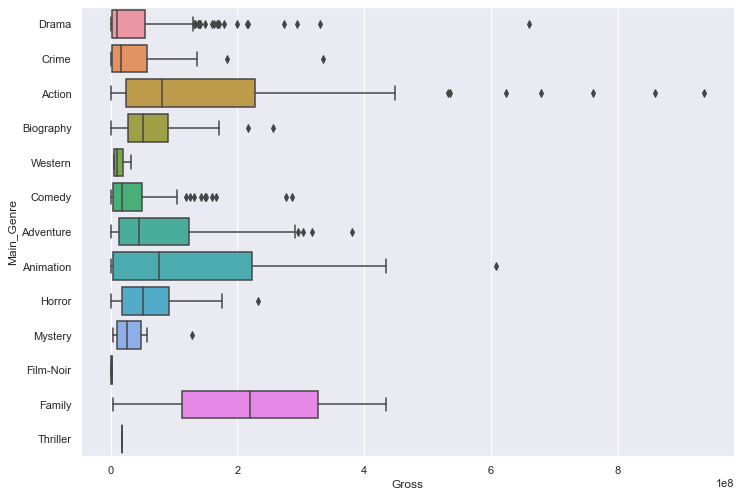

In [49]:
sns.boxplot(data=df, x="Gross", y="Main_Genre")
### Family genre with bigest mean but with very low frequency
### every genre has outliers (black dots outside whiskers)

C:\Users\avrahams\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\avrahams\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\avrahams\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\avrahams\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\avrahams\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\avrahams\Anaconda3\lib\site-packages\seaborn\distributions.py:283:

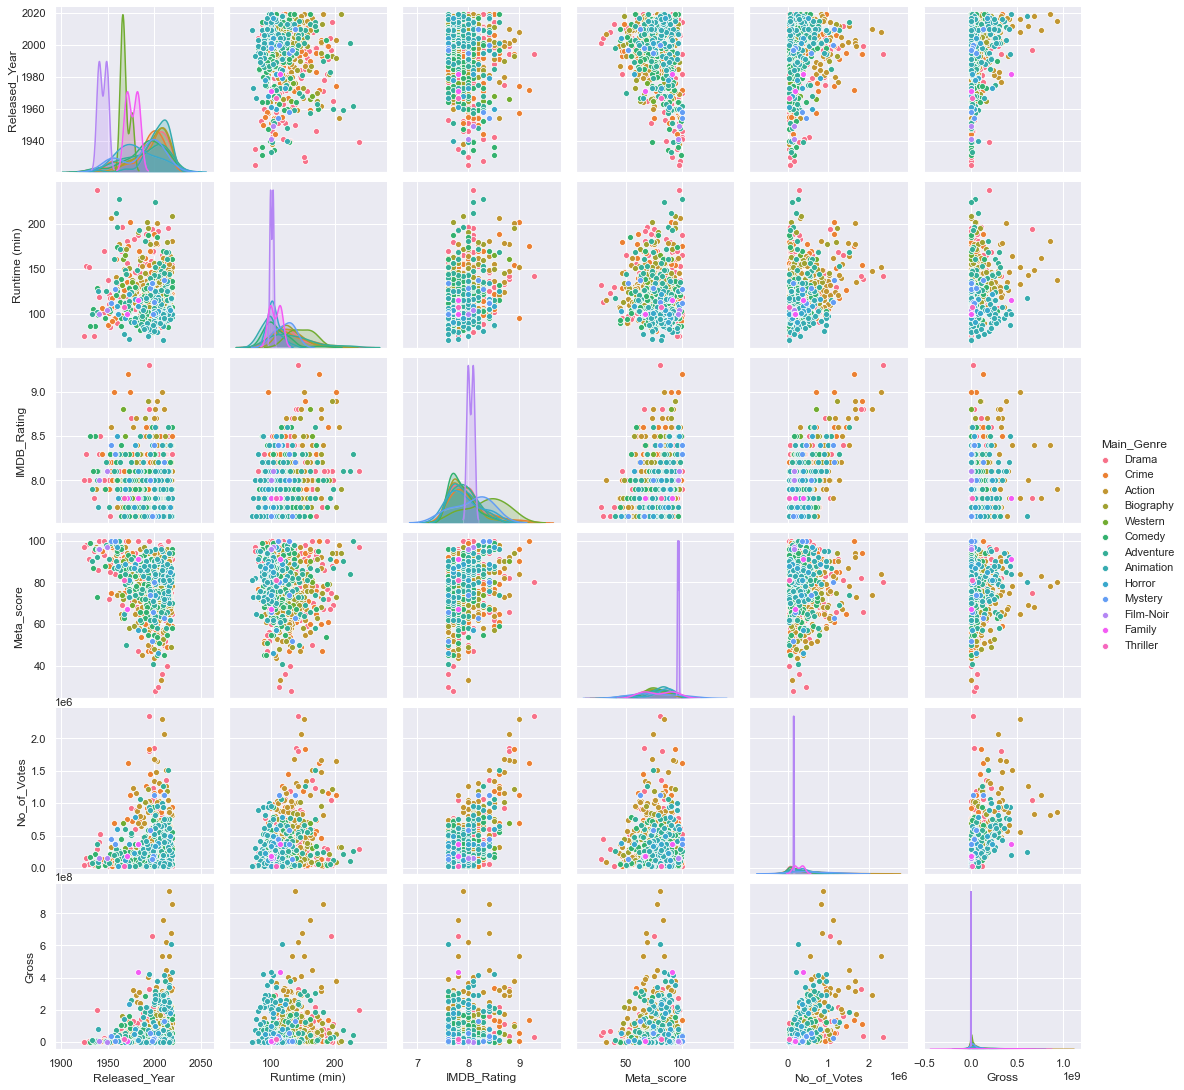

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(df[['Released_Year','Runtime (min)','IMDB_Rating','Meta_score','No_of_Votes','Gross','Main_Genre']],hue = 'Main_Genre')

In [40]:
df[['Released_Year','Runtime (min)','IMDB_Rating','Meta_score','No_of_Votes','Gross','Main_Genre']].corr(method='pearson')

,Released_Year,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.012969,-0.178899,-0.306420,0.203311,0.235827
Runtime (min),0.012969,1.000000,0.255907,-0.012211,0.217212,0.172840
IMDB_Rating,-0.178899,0.255907,1.000000,0.282690,0.614111,0.127845
Meta_score,-0.306420,-0.012211,0.282690,1.000000,0.010308,-0.030587
No_of_Votes,0.203311,0.217212,0.614111,0.010308,1.000000,0.555461
Gross,0.235827,0.172840,0.127845,-0.030587,0.555461,1.000000


## insights
### 1. No_of_Votes correlated to IMDB_Rating and also to Gross (pearson)
### 2.  “weak” correlation between runtime(min) and imdb rating as corr value is 0.25

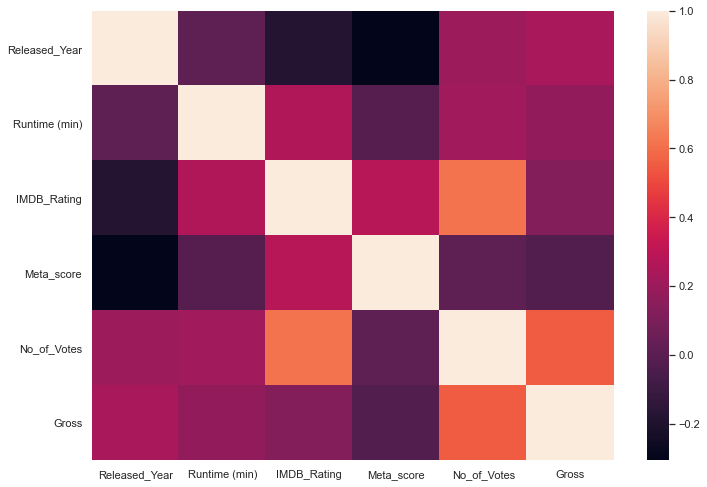

In [41]:
sns.heatmap(df[['Released_Year','Runtime (min)','IMDB_Rating','Meta_score','No_of_Votes','Gross','Main_Genre']].corr(method='pearson'))

## insights:
### A statistical test (Anova) that shows that there is a dependence (p_value<0.05)  between the means "IMDB_Rating"  to "main_genre" at a confidence level of 95%

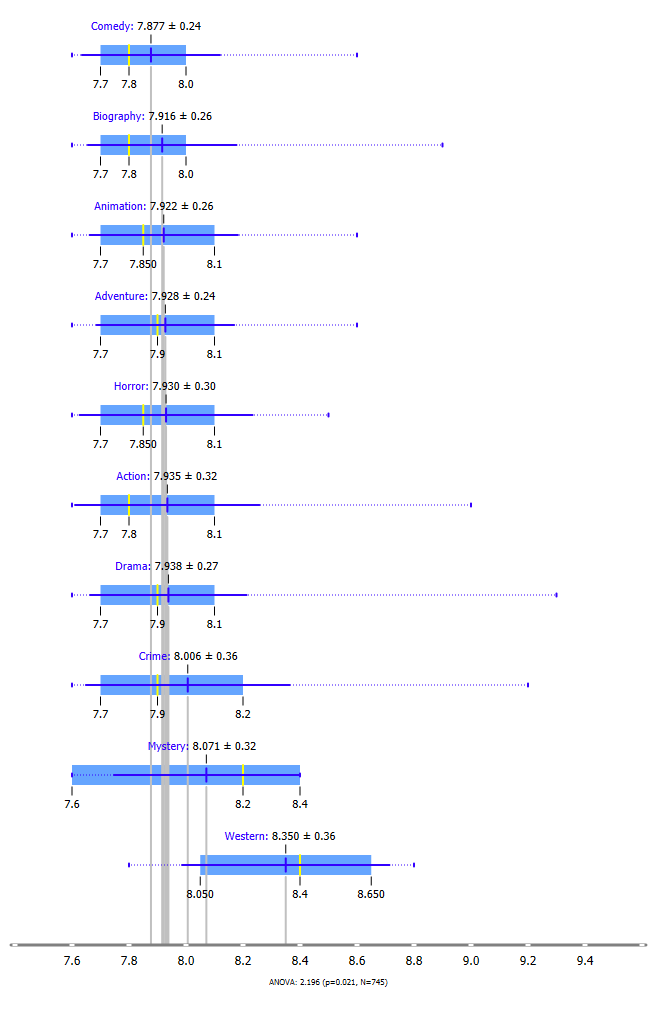

## insights:
### chi squre test shows p_value > 0.05 so  at a confidence level of 95% there is dependence between "Meta score" and "no_of_votes" features (failed to reject Ho) as sieve diagram shows 

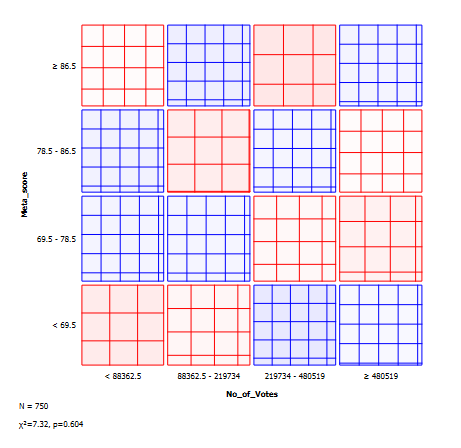

# End